In [195]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_validate
from statistics import mean
from sklearn.metrics import mean_squared_error

#setting up matrices 
steel_data = pd.read_csv('steel.csv')
X = steel_data.iloc[:,:-1]
y = steel_data.iloc[:,-1]


model = DecisionTreeRegressor()

#domain independent and domain specific measure of error
scoring = ['neg_root_mean_squared_error', 'r2']
#10-fold cross validation 
scores = cross_validate(model, X, y, scoring=scoring, cv=10, return_train_score=True, return_estimator=True)

print ("Depths of the DecisionTreeRegressor",
       [DecisionTreeRegressor.get_depth() for DecisionTreeRegressor in scores['estimator']], '\n')

absolute_difference_function = lambda list_value : abs(list_value - target_value)

target_value = 0
print ("RMSE on train data:", scores['train_neg_root_mean_squared_error'])
print ("Mean RMSE on training data:", mean(scores['train_neg_root_mean_squared_error']))
print ("RMSE on test data:", scores['test_neg_root_mean_squared_error'])
print("Mean RMSE on test data:", mean(scores['test_neg_root_mean_squared_error']))
best_rmse_score = min(scores['test_neg_root_mean_squared_error'], key=absolute_difference_function)
best_rmse_index = np.where(scores['test_neg_root_mean_squared_error']==best_rmse_score)[0][0]
print("Best RMSE on test data:", best_rmse_score, ', index: ', best_rmse_index, '\n')

target_value = 1
print ("R2 on train data:", scores['train_r2'])
print("Mean R2 on training data:", mean(scores['train_r2']))
print ("R2 on test data:", scores['test_r2'])
print("Mean R2 on test data:", mean(scores['test_r2']))
best_r2_score = min(scores['test_r2'], key=absolute_difference_function)
best_r2_index = np.where(scores['test_r2']==best_r2_score)[0][0]
print("Best R2 on test data:", best_r2_score, ', index: ',  best_r2_index)

Depths of the DecisionTreeRegressor [18, 18, 22, 18, 21, 19, 19, 19, 19, 17] 

RMSE on train data: [-4.41634125e-15 -0.00000000e+00 -4.41634125e-15 -4.41190494e-15
 -4.41190494e-15 -0.00000000e+00 -4.41190494e-15 -4.41190494e-15
 -0.00000000e+00 -4.41190494e-15]
Mean RMSE on training data: -3.089220721371178e-15
RMSE on test data: [-48.11606039 -70.70452467 -55.25700771 -40.61672158 -40.4871499
 -52.92535399 -40.08452911 -61.74514368 -85.90801058 -76.61281939]
Mean RMSE on test data: -57.24573210049519
Best RMSE on test data: -40.08452911423873 , index:  6 

R2 on train data: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Mean R2 on training data: 1.0
R2 on test data: [ 0.44788193 -0.05632987  0.55097195  0.72752312  0.67420522  0.63984861
  0.61416226  0.36458461  0.34919501  0.30540839]
Mean R2 on test data: 0.46174512234623444
Best R2 on test data: 0.727523120716201 , index:  3


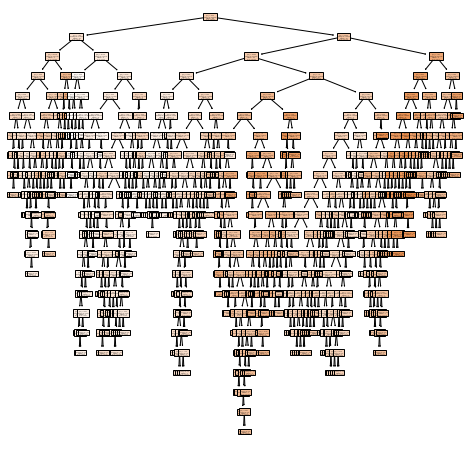

In [190]:
import matplotlib.pyplot as plt
from sklearn import tree


plt.figure(figsize=(8,8))
_ = tree.plot_tree(scores['estimator'][best_rmse_index], filled = True)
#tree graph 1

In [197]:
criterions = ['squared_error', 'friedman_mse', 'absolute_error', 'poisson']
print(criterions)

r2_training_i = []
r2_training_mean_i = []
r2_test_i = []
r2_test_mean_i = []

rmse_training_i = []
rmse_training_mean_i = []
rmse_test_i = []
rmse_test_mean_i = []

tree_depth_i = []

for criterion in criterions:
    
    model_i = DecisionTreeRegressor(criterion = criterion)
    
    
    #10-fold cross validation 
    scores = cross_validate(model_i, X, y, scoring=scoring, cv=10, return_train_score=True, return_estimator=True)
    
    
    
    # compute rmse on the training and test set predictions
    rmse_training_i.append(scores['train_neg_root_mean_squared_error'])
    rmse_training_mean_i.append(mean(scores['train_neg_root_mean_squared_error']))
    rmse_test_i.append(scores['test_neg_root_mean_squared_error'])
    rmse_test_mean_i.append(mean(scores['test_neg_root_mean_squared_error']))
    
    # compute r2 on the training and test set predictions
    r2_training_i.append(scores['train_r2'])
    r2_training_mean_i.append(mean(scores['train_r2']))
    r2_test_i.append(scores['test_r2'])
    r2_test_mean_i.append(mean(scores['test_r2']))

    
print ("Tree depth:", tree_depth_i)
    
print ("RMSE on train data:", *rmse_training_i, sep='\n    ') 
print ("Mean RMSE on training data:", *rmse_training_mean_i, sep='\n    ')
print ("RMSE on test data:", *rmse_test_i, sep='\n    ') 
print ("Mean RMSE on test data:", *rmse_test_mean_i, sep='\n    ')

print('=================================================================')

print ("R2 on train data:", *r2_training_i, sep='\n    ') 
print ("Mean R2 on training data:", *r2_training_mean_i, sep='\n    ')
print ("R2 on test data:", *r2_test_i, sep='\n    ') 
print ("Mean R2 on test data:", *r2_test_mean_i, sep='\n    ')


#tree graph 2

['squared_error', 'friedman_mse', 'absolute_error', 'poisson']
Tree depth: []
RMSE on train data:
    [-4.41634125e-15 -4.41634125e-15 -4.41634125e-15 -4.41190494e-15
 -0.00000000e+00 -4.41190494e-15 -4.41190494e-15 -0.00000000e+00
 -0.00000000e+00 -4.41190494e-15]
    [-4.41634125e-15 -4.41634125e-15 -0.00000000e+00 -4.41190494e-15
 -0.00000000e+00 -4.41190494e-15 -4.41190494e-15 -4.41190494e-15
 -0.00000000e+00 -0.00000000e+00]
    [-0. -0. -0. -0. -0. -0. -0. -0. -0. -0.]
    [-0. -0. -0. -0. -0. -0. -0. -0. -0. -0.]
Mean RMSE on training data:
    -3.089664351945117e-15
    -2.6480302270535636e-15
    0.0
    0.0
RMSE on test data:
    [-48.47340577 -66.53702306 -53.93310813 -44.42860143 -38.22609013
 -47.15484618 -43.85013555 -61.19643625 -82.69356166 -79.77056929]
    [-48.20494202 -69.51957599 -56.57939607 -42.57422221 -42.96490702
 -56.0560448  -45.76406801 -63.8538337  -88.46114187 -78.90841666]
    [-56.13737829 -81.71750677 -57.25061955 -57.03937985 -57.5473362
 -68.39553891

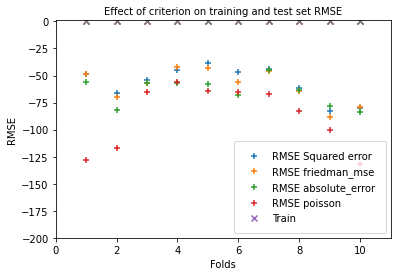

In [201]:
import matplotlib.pyplot as plt
folds = list(range(1, 11))
plt.scatter(folds, rmse_test_i[0],marker="+")
plt.scatter(folds, rmse_test_i[1],marker="+")
plt.scatter(folds, rmse_test_i[2],marker="+")
plt.scatter(folds, rmse_test_i[3],marker="+")
plt.scatter(folds, rmse_training_i[0],marker="x")
plt.scatter(folds, rmse_training_i[1],marker="x")
plt.scatter(folds, rmse_training_i[2],marker="x")
plt.scatter(folds, rmse_training_i[3],marker="x")

plt.xlim([0, 11])
plt.ylim([-200, 1])
plt.xlabel("Folds")
plt.ylabel("RMSE")
legend_labels = ["RMSE Squared error","RMSE friedman_mse", "RMSE absolute_error","RMSE poisson", "Train"]
plt.legend(labels=legend_labels, loc=4, borderpad=1)
plt.title("Effect of criterion on training and test set RMSE", fontsize=10)
plt.show()

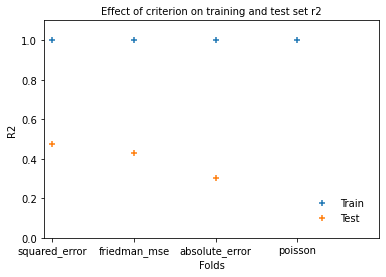

In [220]:
plt.scatter(criterions, r2_training_mean_i,marker="+")
plt.scatter(criterions, r2_test_mean_i,marker="x")


plt.xlim([-0.1, 4])
plt.ylim([0, 1.1])
plt.xlabel("Folds")
plt.ylabel("R2")
legend_labels = ["Train", "Test"]
plt.legend(frameon=False, loc=4,labels=legend_labels,  borderpad=1)
plt.title("Effect of criterion on training and test set r2", fontsize=10)
plt.show()

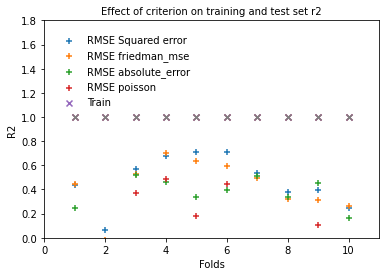

In [221]:
plt.scatter(folds, r2_test_i[0],marker="+")
plt.scatter(folds, r2_test_i[1],marker="+")
plt.scatter(folds, r2_test_i[2],marker="+")
plt.scatter(folds, r2_test_i[3],marker="+")
plt.scatter(folds, r2_training_i[0],marker="x")
plt.scatter(folds, r2_training_i[1],marker="x")
plt.scatter(folds, r2_training_i[2],marker="x")
plt.scatter(folds, r2_training_i[3],marker="x")

plt.xlim([0, 11])
plt.ylim([0, 1.8])
plt.xlabel("Folds")
plt.ylabel("R2")
legend_labels = ["RMSE Squared error","RMSE friedman_mse", "RMSE absolute_error","RMSE poisson", "Train"]
plt.legend(frameon=False, loc=2,labels=legend_labels,  borderpad=1)
plt.title("Effect of criterion on training and test set r2", fontsize=10)
plt.show()

In [229]:
splitters = ["best", "random"]

r2_training_i_n = []
r2_training_mean_i_n = []
r2_test_i_n = []
r2_test_mean_i_n = []

rmse_training_i_n = []
rmse_training_mean_i_n = []
rmse_test_i_n = []
rmse_test_mean_i_n = []


for j in range (2):
    r2_training_i_n.append([])
    r2_training_mean_i_n.append([])
    r2_test_i_n.append([])
    r2_test_mean_i_n.append([])

    rmse_training_i_n.append([])
    rmse_training_mean_i_n.append([])
    rmse_test_i_n.append([])
    rmse_test_mean_i_n.append([])
    

    for criterion in criterions:
        model_k_n = DecisionTreeRegressor(criterion=criterion, splitter=splitters[j])
        
        scores = cross_validate(model_k_n, X, y, scoring=scoring, cv=10, return_train_score=True, return_estimator=True)
    

        # compute rmse on the training and test set predictions
        rmse_training_i_n[j].append(scores['train_neg_root_mean_squared_error'])
        rmse_training_mean_i_n[j].append(mean(scores['train_neg_root_mean_squared_error']))
        rmse_test_i_n[j].append(scores['test_neg_root_mean_squared_error'])
        rmse_test_mean_i_n[j].append(mean(scores['test_neg_root_mean_squared_error']))
    
        # compute r2 on the training and test set predictions
        r2_training_i_n[j].append(scores['train_r2'])
        r2_training_mean_i_n[j].append(mean(scores['train_r2']))
        r2_test_i_n[j].append(scores['test_r2'])
        r2_test_mean_i_n[j].append(mean(scores['test_r2']))
        
    print ("RMSE on train data splitter = ", splitters[j], *rmse_training_i_n[j], sep='\n    ') 
    print ("Mean RMSE on training data splitter = ", splitters[j], *rmse_training_mean_i_n[j], sep='\n    ')
    print ("RMSE on test data splitter = ", splitters[j],  *rmse_test_i_n[j], sep='\n    ') 
    print ("Mean RMSE on test data splitter = ", splitters[j],  *rmse_test_mean_i_n[j], sep='\n    ')

    print('=================================================================')

    print ("R2 on train data splitter = ", splitters[j], *r2_training_i_n[j], sep='\n    ') 
    print ("Mean R2 on training data splitter = ", splitters[j],  *r2_training_mean_i_n[j], sep='\n    ')
    print ("R2 on test data splitter = ", splitters[j],  *r2_test_i_n[j], sep='\n    ') 
    print ("Mean R2 on test data splitter = ", splitters[j],  *r2_test_mean_i_n[j], sep='\n    ')
    
    print('=================================================================')
    


RMSE on train data splitter = 
    best
    [-4.41634125e-15 -0.00000000e+00 -4.41634125e-15 -4.41190494e-15
 -4.41190494e-15 -4.41190494e-15 -4.41190494e-15 -4.41190494e-15
 -0.00000000e+00 -4.41190494e-15]
    [-0.00000000e+00 -4.41634125e-15 -0.00000000e+00 -0.00000000e+00
 -4.41190494e-15 -4.41190494e-15 -4.41190494e-15 -4.41190494e-15
 -0.00000000e+00 -0.00000000e+00]
    [-0. -0. -0. -0. -0. -0. -0. -0. -0. -0.]
    [-0. -0. -0. -0. -0. -0. -0. -0. -0. -0.]
Mean RMSE on training data splitter = 
    best
    -3.5304112156887922e-15
    -2.2063961021620102e-15
    0.0
    0.0
RMSE on test data splitter = 
    best
    [-48.37495287 -75.30531985 -52.0215653  -45.75666355 -40.16983998
 -53.91553789 -39.05541719 -61.55617213 -86.22957275 -78.673582  ]
    [-45.06620771 -77.33776426 -54.04322019 -41.94094449 -42.02433279
 -53.59863611 -38.23068685 -63.97194843 -89.22674421 -76.44475312]
    [-45.19125894 -74.72096535 -60.03273577 -49.89282068 -37.06139103
 -68.46554004 -45.73445621 -5

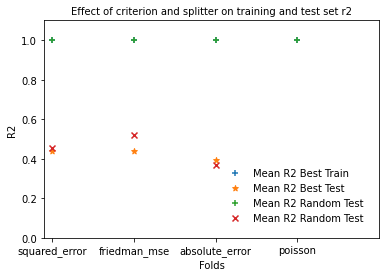

In [232]:
plt.scatter(criterions, r2_training_mean_i_n[0],marker="+")
plt.scatter(criterions, r2_test_mean_i_n[0],marker="*")
plt.scatter(criterions, r2_training_mean_i_n[1],marker="+")
plt.scatter(criterions, r2_test_mean_i_n[1],marker="x")


plt.xlim([-0.1, 4])
plt.ylim([0, 1.1])
plt.xlabel("Folds")
plt.ylabel("R2")
legend_labels = ["Mean R2 Best Train", "Mean R2 Best Test", "Mean R2 Random Test", "Mean R2 Random Test"]
plt.legend(frameon=False, loc=4,labels=legend_labels,  borderpad=1)
plt.title("Effect of criterion and splitter on training and test set r2", fontsize=10)
plt.show()